In [1]:
# Import libraries and dependencies
import pandas as pd
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
etf_df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\1\07-Stu_ETF\Resources\high_frequency_euro_ETF_bid_ask_spreads.csv'),
                     parse_dates=True,
                     index_col='timestamp')

etf_df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50.595622+00:00,0.00
2018-12-24 13:00:02.757045+00:00,108.89
2018-12-24 13:00:02.757115+00:00,-0.22
2018-12-24 13:00:13.828698+00:00,-0.21
2018-12-24 13:00:19.347938+00:00,-0.20


In [3]:
# Resample to 10 Seconds ('10S'), take the mean, and drop the NaN values
etf_resampled_df = etf_df.resample('10S').mean().dropna()

etf_resampled_df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50+00:00,0.000000
2018-12-24 13:00:00+00:00,54.335000
2018-12-24 13:00:10+00:00,-0.205000
2018-12-24 13:00:20+00:00,-0.186667
2018-12-24 13:00:30+00:00,27.080000


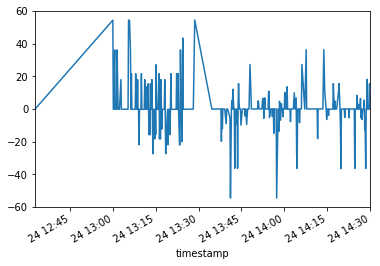

In [4]:
# Plot the resulting bid-ask spread data
etf_resampled_df.bid_ask_spread.plot()

In [5]:
# Use the `bid_ask_spread_autocorr` function to calculate the autocorrelation
etf_resampled_df.bid_ask_spread.autocorr()

0.13633199304665175

# Visualize the Autocorrelation

Plot the ACF and PACF Plots

In [6]:
# Import ACF and PACF plots
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

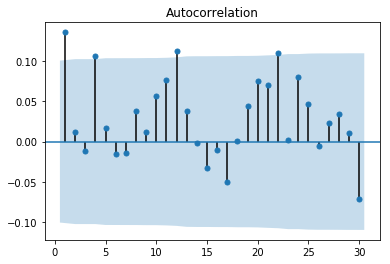

In [7]:
# Plot the ACF of the `bid_ask_spread` data with a lag of 30
sm.graphics.tsaplots.plot_acf(etf_resampled_df.bid_ask_spread,
                              lags=30,
                              zero=False);

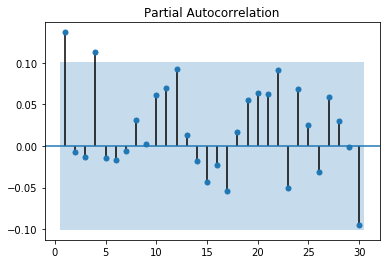

In [8]:
# Plot the PACF of the `bid_ask_spread` data with a lag of 30
sm.graphics.tsaplots.plot_pacf(etf_resampled_df.bid_ask_spread,
                               lags=30,
                               zero=False);

How many significant lags do you see in these plots outside the default confidence interval of 95%?

Answer: For acf: 4;
        For pacf: 2